In [1]:
import pandas as pd
import numpy as np
import sys, os
# ceļu norādīt nevajag, ja pakotne ir instalēta
documentpath=os.getcwd()
libpath=os.path.abspath(os.path.join(documentpath, os.pardir))
sys.path.append(libpath)
from sudrabainiemakoni.cloudimage import CloudImage
from sudrabainiemakoni import plots

### Katalogi un failu nosaukumi

In [2]:
# katalogs ar piemēra failiem
sample_directory = 'SampleData'
# katalogs ar rezultātu failiem
results_directory = 'SampleResults'
if not os.path.exists(results_directory):
    os.makedirs(results_directory)
# sudrabaino mākoņu attēls
case_id = 'js_202106210100'
filename_jpg = f'{sample_directory}/{case_id}.jpg'
# nociparotās zvaigznes
filename_stars = f'{sample_directory}/{case_id}_zvaigznes.txt'
# ģeogrāfiskais garums platums
lat, lon = 56.693, 23.656

### Inicializācija, datuma, ģeogrāfisko koordināšu un zvaigžņu uzstādīšana

In [3]:
#inicializējam CloudImage tipa objektu
cldim = CloudImage(case_id, filename_jpg)

In [4]:
#Norādam datumu, pieprasot to no EXIF
cldim.setDateFromExif()

In [5]:
#Uzstādām novērotāja ģeogrāfisko platumu un garumu (grādos)
cldim.setLocation(lat=lat, lon=lon)

In [6]:
print('UTC:', cldim.date)
print(cldim.location.to_geodetic())

UTC: 2021-06-20 22:00:15
GeodeticLocation(lon=<Longitude 23.656 deg>, lat=<Latitude 56.693 deg>, height=<Quantity 0. m>)


In [7]:
# uzstādām zvaigžņu sarakstu
df = pd.read_csv(filename_stars, sep='\t', header=None)
# zvaigžņu nosaukumi pirmajā kolonā
starnames = df[0]
# atbilstošās pikseļu koordinātes otrajā un trešajā kolonā
pixels=np.array(df[[1,2]])
cldim.setStarReferences(starnames, pixels)

Capella <SkyCoord (ICRS): (ra, dec) in deg
    (79.17232794, 45.99799147)>
Mirfak <SkyCoord (ICRS): (ra, dec) in deg
    (51.08070872, 49.86117929)>
Beta Aur <SkyCoord (ICRS): (ra, dec) in deg
    (89.88217887, 44.94743257)>
Delta Aur <SkyCoord (ICRS): (ra, dec) in deg
    (89.88174341, 54.28473796)>
Omicron Uma <SkyCoord (ICRS): (ra, dec) in deg
    (127.56612767, 60.71816986)>
Alpha Cam <SkyCoord (ICRS): (ra, dec) in deg
    (73.51254333, 66.3426768)>
Algol <SkyCoord (ICRS): (ra, dec) in deg
    (47.04221856, 40.95564667)>


In [8]:
# izdrukājam zvaigžņu ekvatoriālās un pikseļu koordinātes pārbaudes nolūkos
print(cldim.getSkyCoords())
print(cldim.getPixelCoords())

<SkyCoord (ICRS): (ra, dec) in deg
    [( 79.17232794, 45.99799147), ( 51.08070872, 49.86117929),
     ( 89.88217887, 44.94743257), ( 89.88174341, 54.28473796),
     (127.56612767, 60.71816986), ( 73.51254333, 66.3426768 ),
     ( 47.04221856, 40.95564667)]>
[[3133.5   2807.5  ]
 [4485.5   2193.   ]
 [2561.    2872.667]
 [2640.    2170.333]
 [1331.667 1106.333]
 [3235.375 1264.25 ]
 [5081.667 2756.   ]]


### Kameras kalibrēšana

In [9]:
# kalibrējam kameras novietojumu, izdrukājam referencēšanas kļudu pikseļos (divas pēdējas rindiņas)
cldim.PrepareCamera()

Loading image: js_202106210100.jpg
     fun: 3.54933645075389
     jac: array([-1.93119049e-05, -2.73883343e-05, -2.08914280e-05,  6.37769699e-06])
 message: 'Optimization terminated successfully'
    nfev: 187
     nit: 36
    njev: 36
  status: 0
 success: True
       x: array([4305.66739339, 4272.77517078, 3001.91769073, 2035.5192292 ])
ENU camera res: 3.54933645075389
ECEF camera res: 3.5493363323558396


In [10]:
az, el, rot = cldim.camera.get_azimuth_elevation_rotation()
print(f'Kameras ass azimuts {az:.2f}°') 
print(f'Kameras ass augstums virs horizonta {el:.2f}°')
print(f'Kameras pagrieziena leņķis {rot:.2f}°')

Kameras ass azimuts 0.66°
Kameras ass augstums virs horizonta 23.02°
Kameras pagrieziena leņķis 0.26°


In [11]:
# noglabājam kameras iestatījumus
cldim.SaveCamera(f'{results_directory}/{case_id}_kam.json')

### Attēls ar horizontālo koordinātu režģi

In [12]:
#plots.PlotAltAzGrid(cldim,   stars = True, showplot=True, from_camera = True)
# ja attēls jānoglabā failā, pie parametriem jāpievieno outImageDir = results_directory+'/'

### Attēls ar horizontālo koordinātu režģi  
Ar x simboliem uzzīmētas zvaigžņu pozīcijas atbilstoši kameras referencēšanai, ar o simboliem, atbilstoši uzdotajām pikseļu koordinātēm  
Ideālā gadījumā tie sakrīt, bet jāņem vērā arī tas, ka pārējā skata laukā koordināšu režģis nedrīkst būt izkropļots, jābauda arī horizonta pozīcija

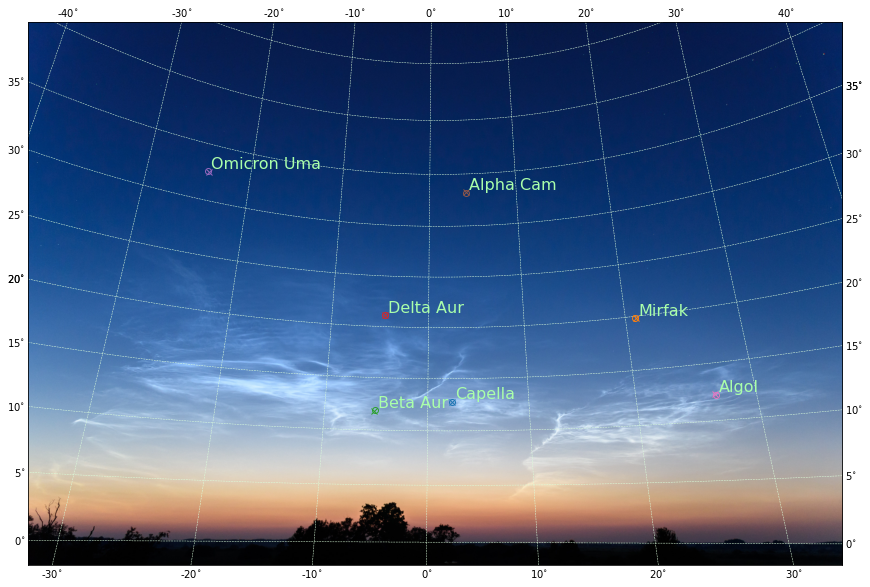

In [13]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20,10))
plots.PlotAltAzGrid(cldim,   stars = False, showplot=False, from_camera = True, ax=ax)
# zvaigžņu koordinātes enu sistēmā, vienības attālumam
enu_unit_coords = cldim.get_stars_enu_unit_coords()
# zvaigžņu pikseļu koordinātes atbilstoši referencētai kamerai
campx=cldim.camera.camera_enu.imageFromSpace(enu_unit_coords)
# ievadītās zvaigžņu pikseļu koordinātes
pxls = cldim.getPixelCoords()
for sr, cpx in zip(cldim.starReferences, campx):
    ix, iy = sr.pixelcoords
    p=ax.plot(ix,iy, marker='o', fillstyle='none')
    ax.annotate(sr.name, xy=(ix,iy), xytext=(3,3), color='#AAFFAA', fontsize=16, textcoords='offset pixels')
    ax.plot(cpx[0],cpx[1], marker='x', fillstyle='none', color=p[0].get_color())
fig.savefig(f'{results_directory}/{case_id}_horizkoord.jpg', dpi=300, bbox_inches='tight')
plt.show()

### Attēls ar ekvatoriālo koordināšu režģi

In [14]:
# iegūstam attēla WCS ekvatoriālajām kordinātēm
cldim.GetWCS(sip_degree=2, fit_parameters={'projection':'TAN'})

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN-SIP'  'DEC--TAN-SIP'  
CRVAL : 101.83584493853994  59.8796766969011  
CRPIX : 2238.2178274415032  1662.4954017616801  
CD1_1 CD1_2  : -0.012324415838324049  -0.0036428464640917376  
CD2_1 CD2_2  : 0.0038193422997161155  -0.012581297306892404  
NAXIS : 3751.0000000000005  1767.3339999999998


In [ ]:
plots.PlotRADecGrid(cldim,   stars = False, showplot=True )
# ja attēls jānoglabā failā, pie parametriem  jāpievieno outImageDir = results_directory+'/'

Calculate RaDec grid
